<a href="https://colab.research.google.com/github/ermtly/Pytorch-Experiment/blob/main/pytorch_experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [9]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (5 data point of the trade)
  # ---> Hidden Layer1 (acc_risk)
  # ---> Hidden Layer2 (leverage)
  # ---> Hidden Layer3 (net_return)
  # ---> Hidden Layer4 (pers_return)
  # ---> Hidden Layer5 (duration_minutes)
  def __init__(self, in_features=5, h1=8, h2=9, out_features=5):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1) #fully connected
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)


  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [10]:
# Pick a manual seed for randomization
torch.manual_seed(34)
# Create an instance of model
model = Model()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
url = 'sample_data/tradelog.csv'

my_df = pd.read_csv(url, sep='\t')
# print(my_df.columns)
df = my_df[['acc_risk', 'leverage', 'net_return', 'pers_return', 'duration_minutes', 'rating']]

df

,acc_risk,leverage,net_return,pers_return,duration_minutes,rating
0,3.0,1.00,203.49,33.0,0,0
1,1.0,1.00,197.54,23.0,0,0
2,2.0,1.00,110.67,57.0,0,0
3,1.0,18.87,65.45,33.0,0,0
4,3.0,12.00,89.25,93.0,0,0
...,...,...,...,...,...,...
1401,2.0,6.49,139.84,40.0,0,0
1402,3.0,10.75,23.56,19.0,0,0
1403,4.0,3.80,195.16,20.0,0,0
1404,5.0,1.00,109.48,37.0,0,0


In [29]:
# Train Test Split ! Set X, y
X = df.drop('rating', axis=1)
y = df['rating']

In [31]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [33]:
X

array([[  3.  ,   1.  , 203.49,  33.  ,   0.  ],
       [  1.  ,   1.  , 197.54,  23.  ,   0.  ],
       [  2.  ,   1.  , 110.67,  57.  ,   0.  ],
       ...,
       [  4.  ,   3.8 , 195.16,  20.  ,   0.  ],
       [  5.  ,   1.  , 109.48,  37.  ,   0.  ],
       [  4.  ,   1.  ,  39.27,  35.  ,   0.  ]])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [38]:
# Convert X features to float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [40]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [41]:
# Set the criterion of model to mesure the error, how far off the predictions from the data
criterion = nn.CrossEntropyLoss()
#Chose Adam Optimizer, lr = learning rate (if error doesnt go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [46]:
model.parameters(recurse=True)

<generator object Module.parameters at 0x79ba79dc11c0>

In [48]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted value vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: Take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 0.6420906186103821
Epoch: 10 and loss: 0.003417181083932519
Epoch: 20 and loss: 3.305665450170636e-05
Epoch: 30 and loss: 4.187802005617414e-06
Epoch: 40 and loss: 1.7359074035994126e-06
Epoch: 50 and loss: 1.2122684438509168e-06
Epoch: 60 and loss: 1.0490898603165988e-06
Epoch: 70 and loss: 9.886518910207087e-07
Epoch: 80 and loss: 9.629922033127514e-07
Epoch: 90 and loss: 9.495259405412071e-07


Text(0.5, 0, 'epochs')

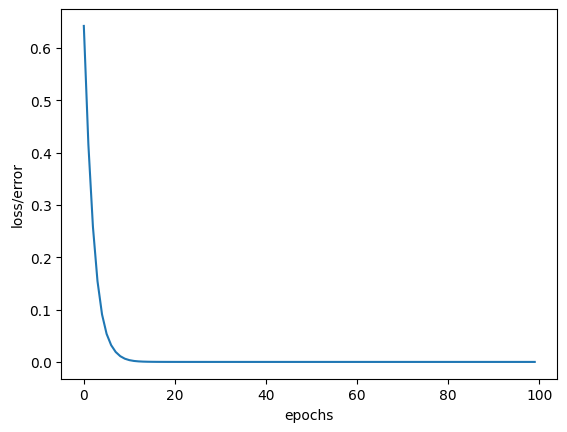

In [49]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")

In [50]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [51]:
loss

tensor(8.6236e-08)

In [54]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what rating class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f"We got {correct} correct!")

1.) tensor([ 96.5138, -37.2015, -26.7254, -43.7891, -30.4012]) 	 0 	 0
2.) tensor([ 46.7736, -17.3952, -12.8685, -21.4752, -14.4539]) 	 0 	 0
3.) tensor([ 35.4588, -14.5513,  -9.6266, -16.3831, -12.0579]) 	 0 	 0
4.) tensor([ 99.3600, -36.3556, -27.3914, -45.4081, -30.0461]) 	 0 	 0
5.) tensor([ 37.4191, -13.9079, -10.7356, -16.5972, -10.9924]) 	 0 	 0
6.) tensor([19.4297, -8.9393, -5.2750, -8.9700, -7.3574]) 	 0 	 0
7.) tensor([ 60.6422, -21.5209, -16.7611, -27.7743, -17.9046]) 	 0 	 0
8.) tensor([ 66.2096, -25.2507, -18.1656, -30.3469, -20.8664]) 	 0 	 0
9.) tensor([107.9552, -40.0980, -29.7791, -49.2464, -33.0299]) 	 0 	 0
10.) tensor([ 67.2741, -24.0321, -18.5471, -30.8455, -19.9933]) 	 0 	 0
11.) tensor([ 38.1268, -15.7603, -10.4377, -17.4740, -12.9574]) 	 0 	 0
12.) tensor([ 27.5757, -11.2734,  -6.5525, -11.2313,  -9.2675]) 	 0 	 0
13.) tensor([ 83.2627, -30.9159, -22.9773, -38.0077, -25.4995]) 	 0 	 0
14.) tensor([ 79.7357, -28.3585, -22.0309, -36.4727, -23.5363]) 	 0 	 0
15.) t